In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [123]:
# Define colors
GRAY = ['#231F20', '#393536', '#4f4c4d', '#656263', '#7b7979', '#918f90', '#a7a5a6', '#bdbcbc', '#d3d2d2', '#e9e9e9']
BLUE = ['#174b7e','#2e5d8b', '#456f98', '#5d81a5', '#7493b2', '#8ba5bf', '#a2b7cb', '#b9c9d8', '#d1dbe5', '#e8edf2']
RED = ['#C3514E', '#E6BAB7']
GREEN = ['#0C8040', '#9ABB59']
ORANGE = ['#F79747']

# Configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Process the data

In [105]:
# Get the co2 emissions of all countries in 2021
# Dataset: https://zenodo.org/record/7215364 
co2_emissions = pd.read_csv("../datasets/co2_emissions_2022/GCB2022v27_MtCO2_flat.csv")
co2_emissions = co2_emissions[co2_emissions['Year'] == 2021]
co2_emissions = co2_emissions[co2_emissions['Country'] != 'Global']
display(co2_emissions)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
271,Afghanistan,AFG,2021,11.874211,4.203536,7.419570,0.238847,0.012259,0.000000,NaN,0.296119
543,Albania,ALB,2021,4.619109,0.174413,3.246273,0.150245,1.048179,0.000000,NaN,1.618066
815,Algeria,DZA,2021,176.269070,1.095536,56.020598,92.791955,11.028039,15.332942,NaN,3.989977
1087,Andorra,AND,2021,0.452888,0.000000,0.452888,0.000000,0.000000,0.000000,NaN,5.730292
1359,Angola,AGO,2021,21.362717,0.000000,13.901716,2.951298,1.123730,3.385974,NaN,0.619141
...,...,...,...,...,...,...,...,...,...,...,...
61743,Wallis and Futuna Islands,WLF,2021,0.027818,0.000000,0.027818,0.000000,0.000000,0.000000,NaN,2.392571
62015,Yemen,YEM,2021,12.476597,0.245909,9.592510,0.206611,0.663596,1.767971,NaN,0.378289
62287,Zambia,ZMB,2021,7.676180,2.463629,4.251568,0.000000,0.960983,0.000000,NaN,0.394194
62559,Zimbabwe,ZWE,2021,11.296114,7.225620,3.500879,0.000000,0.569615,0.000000,NaN,0.706293


# Plot the scatter plot

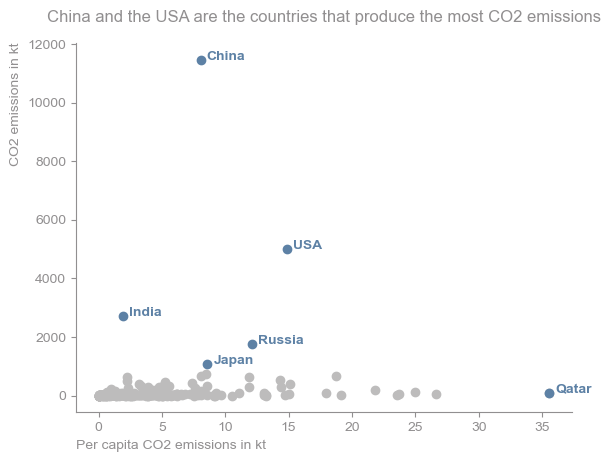

In [121]:
countries_with_high_emissions = co2_emissions[(co2_emissions['Total'] > 1000) | (co2_emissions['Per Capita'] > 30)]
other_countries = co2_emissions[co2_emissions['Total'] <= 1000]

ax = plt.subplot()
ax.scatter(other_countries['Per Capita'], other_countries['Total'], color=GRAY[7])
ax.scatter(countries_with_high_emissions['Per Capita'], countries_with_high_emissions['Total'], color=BLUE[3])

for i in range(len(countries_with_high_emissions)):
    country = countries_with_high_emissions.iloc[i]
    plt.annotate(country['Country'], 
                xy=(country['Per Capita'] + 0.5, country['Total']), 
                xycoords='data',
                color=BLUE[3],
                weight='bold')

# Add styling for the scatter plot
ax.set_title('China and the USA are the countries that produce the most CO2 emissions', color=GRAY[5], pad=15)

ax.set_ylabel('CO2 emissions in kt', loc='top', color=GRAY[5])
ax.set_xlabel('Per capita CO2 emissions in kt', loc='left', color=GRAY[5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(GRAY[5])
ax.spines['left'].set_color(GRAY[5])

ax.tick_params(axis='x', colors=GRAY[5], which='both')
ax.tick_params(axis='y', colors=GRAY[5], which='both')